<a href="https://colab.research.google.com/github/belyakovmy/pet-projects/blob/main/EDA%3AAnimalShelterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA
EDA (Exploratory Data Analysis) — это исследовательский анализ данных. Его цель — понять структуру данных, выявить закономерности, аномалии, ошибки, подготовить данные для дальнейшей работы.

#Структура данных

Это реальный набор данных муниципального приюта для животных Austin Animal Center в город Остин. Там принимают животных, нуждающихся в приюте, независимо от возраста, здоровья, вида или породы. Все животные получают уникальный идентификатор во время приема.

![Austin Animal Center](https://www.austinmonitor.com/wp-content/uploads/2016/07/18241799911_6a9424c904_k-620x365.jpg)

У нас есть данные за период с 1 октября 2013 года по 3 марта 2021 года.

* Animal ID: уникальный ID животного.
* Name: имя животного.
* DateTime: дата и время приема.
* MonthYear: месяц и год приема.
* Found Location: место, где было найдено животное.
* Intake Type: тип приема (бродячий, сдавший хозяин итд).
* Intake Condition: состояние животного во время приема.
* Animal Type: тип животного (собака, кошка итд).
* Sex upon Intake: пол животного и стерилизовано/кастрировано ли оно.
* Age upon Intake: возраст животного, если известно.
* Breed: порода.
* Color: окрас.

#Предобработка

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/belyakovmy/pet-projects/refs/heads/main/datasets/AustinAnimalCenterIntakes.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


Данные в столбцах DateTime и MonthYear совпадают, поэтому удалим один из них:

In [ ]:
data.drop(columns='MonthYear', axis=1, inplace=True)

Приведем заголовки к более удобному виду:

In [ ]:
data.columns = list(map(lambda x: x.replace(' ', '_').lower(), data.columns))

In [ ]:
data.head()

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         124120 non-null  object
 1   name              85069 non-null   object
 2   datetime          124120 non-null  object
 3   found_location    124120 non-null  object
 4   intake_type       124120 non-null  object
 5   intake_condition  124120 non-null  object
 6   animal_type       124120 non-null  object
 7   sex_upon_intake   124119 non-null  object
 8   age_upon_intake   124120 non-null  object
 9   breed             124120 non-null  object
 10  color             124120 non-null  object
dtypes: object(11)
memory usage: 10.4+ MB


In [ ]:
data.duplicated().sum()

np.int64(19)

In [ ]:
data.drop_duplicates(inplace=True)

Есть пропуски в поле name - не у каждого поступающего животного известно имя. И один пропуск в поле о стерилизации (sex_upon_intake).

In [ ]:
data.isnull().sum()

,0
animal_id,0
name,39046
datetime,0
found_location,0
intake_type,0
intake_condition,0
animal_type,0
sex_upon_intake,1
age_upon_intake,0
breed,0


In [ ]:
data.fillna('Unknown', inplace=True)

In [ ]:
data

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,Unknown,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...
124115,A828158,Odin,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,A830183,Unknown,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White
124117,A830180,Gigi,03/03/2021 04:31:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White
124118,A830171,Unknown,03/03/2021 05:13:00 PM,1310 West Howard Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Plott Hound Mix,Brown Brindle/White


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %I:%M:%S %p')

#Исследование  

Рассмотрим набор данных и ответим на такие вопросы, как:
* на какой год пришлось наибольшее количество регистраций животных в приюте и есть ли сезонность,
* какой вид животных преобладает и оказываются ли они в приюте повторно,
* какая наиболее часто встречающаяся причина регистрации,
* какие имена  популярны у животных  

и другие.

Будем рассматривать данные за полные года в период с 2014 по 2020:

In [ ]:
data = data[(data['datetime'].dt.year >= 2014) & (data['datetime'].dt.year <= 2020)]

In [ ]:
 df = data.copy()

Выделим год, месяц и день недели:

In [ ]:
df.insert(loc=3, column='year', value=df['datetime'].dt.year)
df.insert(loc=4, column='year_month', value=df['datetime'].dt.strftime('%Y-%m'))
df.insert(loc=5, column='weekday', value=df['datetime'].dt.strftime('%A'))

In [ ]:
df.head()

,animal_id,name,datetime,year,year_month,weekday,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,2019-01-03 16:19:00,2019,2019-01,Thursday,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,2015,2015-07,Sunday,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2016,2016-04,Thursday,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A682524,Rio,2014-06-29 10:38:00,2014,2014-06,Sunday,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,2017-02-18 12:46:00,2017,2017-02,Saturday,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


###Количество регистраций животных в разные временные срезки:

С 2014 по 2018 год была тенденция к снижению количества поступивших животных.  
В 2019 году произошел скачек, а после - снижение почти в половину:

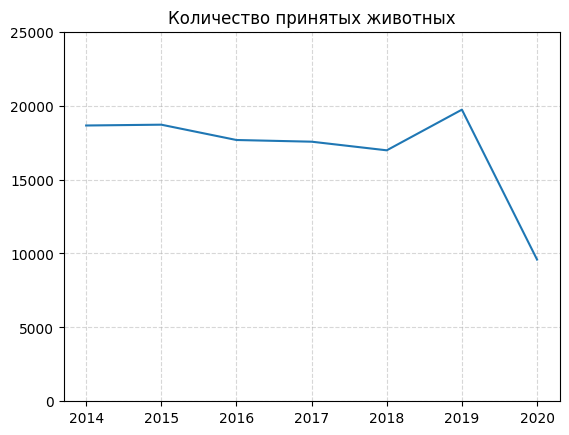

In [ ]:
df['year'].value_counts().sort_index().plot(kind='line',
                                            ylim=(0,25000),
                                            xlabel=(''),
                                            title='Количество принятых животных'
                                            )
plt.grid(ls='--', alpha=0.5)

Количество поступивших животных в разрезе года и месяца:

In [ ]:
ym = df['year_month'].value_counts().sort_index().reset_index()
ym.head()

,year_month,count
0,2014-01,1271
1,2014-02,1192
2,2014-03,1484
3,2014-04,1535
4,2014-05,1957


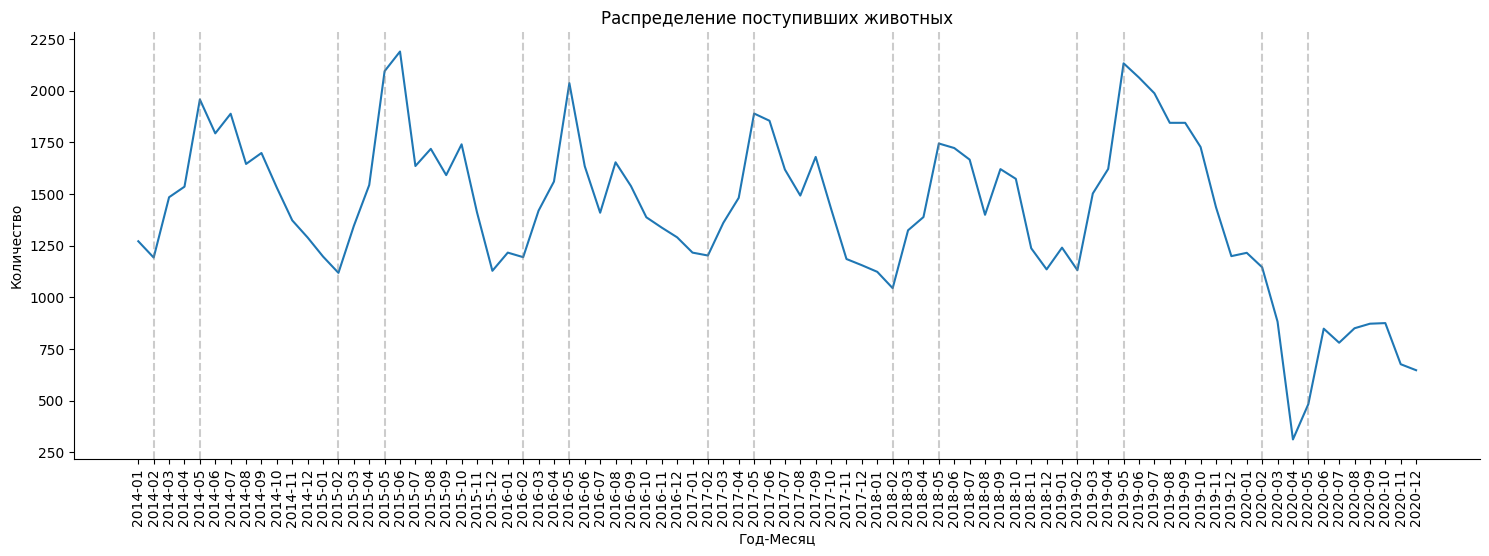

In [ ]:
sns.relplot(
    data=ym,
    x='year_month',
    y='count',
    aspect=3,
    kind='line'
)

for month in ym['year_month'].values:
  if month.endswith(('02', '05')):
    plt.axvline(month, color='grey', ls='--', alpha=0.4)

plt.xlabel('Год-Месяц')
plt.ylabel('Количество')
plt.title('Распределение поступивших животных')
plt.xticks(rotation=90)
plt.show()

В этом распределении наблюдается сезонность: примерно на февраль каждого года приходится минимум принятых животных, затем их количество начинает расти и приходит в пик в мае-июне. Далее вновь наблюдается снижение и небольшой рост в сентябре-октябре. Затем число поступающих животных снижается до февраля следующего года.  

Это изменилось в 2019-2020 году: после февраля 2020 года количество поступающих животных продолжило падать вплоть до апреля 2020 года. Возможно, это связано с пандемией COVID-19.

###Рассмотрим подробнее результаты за 2019 и 2020 годы

####По типам приема животных

Есть шесть типов причин, которые указываются при регистрации животного в приюте.  

Выше мы заметили, что на 2020 год пришелся спад: посмотрим на это в разрезе типов регистрации, что уменьшилось наиболее значимо:

In [ ]:
print('Список типов регистрации в приюте:', end='\n\n')
print(*df['intake_type'].unique(), sep='\n')

Список типов регистрации в приюте:

Stray
Owner Surrender
Public Assist
Wildlife
Euthanasia Request
Abandoned


In [ ]:
pivot_intake_type = pd.pivot_table(
    data = df.query('year in (2019, 2020)'),
    index='intake_type',
    columns='year',
    values='animal_id',
    aggfunc='count',
    fill_value=0
)

In [ ]:
pivot_intake_type['percentage_change'] = ((pivot_intake_type[2020].div(pivot_intake_type[2019], fill_value=0) - 1) * 100)\
                                          .round(1)\
                                          .replace(float(np.inf), 100)
pivot_intake_type

year,2019,2020,percentage_change
intake_type,,,
Abandoned,0,261,100.0
Euthanasia Request,4,0,-100.0
Owner Surrender,4291,2388,-44.3
Public Assist,1042,601,-42.3
Stray,13910,5821,-58.2
Wildlife,479,514,7.3


* Наиболее сильный спад произошел среди регистрации бродячих (Stray) животных: примерно 58.2%.  
* С причиной Сдача владельца(Owner Surrender) и Общественная помощь(Public Assist) зарегистрировали на 44.3% и 42.3% меньше соответсвенно.  
* При этом на 7.3% больше зарегистрировали Диких животных(Wildlife)  
и, к сожалению, на 261 случай больше зарегистрировано Выброшенных животных(Abandoned).

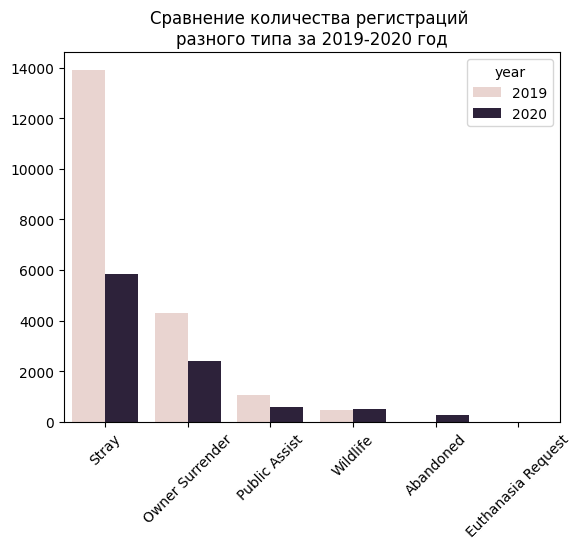

In [ ]:
sns.countplot(
    data=df.query('year in (2019, 2020)'),
    x='intake_type',
    hue='year',
    order=['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Abandoned', 'Euthanasia Request']
)
plt.xticks(rotation=45)
plt.title('Сравнение количества регистраций \nразного типа за 2019-2020 год')
plt.xlabel('')
plt.ylabel('')
plt.show()

####По типам животных

Посмотрим, как изменилось количество регистраций разных животных за эти два года.

* Наибольший спад произошел среди Домашнего скота(Livestock): 71.43%, однако в абсолютных значениях изменение не кажется таким существенным: с 7 до 2-х особей.  
* Кошек зарегистрировали меньше на 56.2%, птиц на 54.7% и собак на 50.4%:

In [ ]:
pivot_animal_type = pd.pivot_table(
    data = df.query('year in (2019, 2020)'),
    index='animal_type',
    columns='year',
    values='animal_id',
    aggfunc='count',
    fill_value=0
)

pivot_animal_type['percentage_change'] = ((pivot_animal_type[2020].div(pivot_animal_type[2019], fill_value=0) - 1) * 100)\
                                          .round(1)
pivot_animal_type

year,2019,2020,percentage_change
animal_type,,,
Bird,95,43,-54.7
Cat,7881,3450,-56.2
Dog,10928,5418,-50.4
Livestock,7,2,-71.4
Other,815,672,-17.5


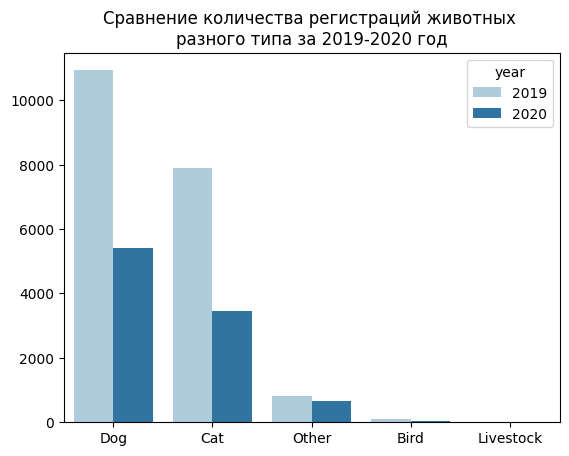

In [ ]:
sns.countplot(
    data=df.query('year in (2019, 2020)'),
    x='animal_type',
    hue='year',
    palette='Paired'
)
plt.title('Сравнение количества регистраций животных \nразного типа за 2019-2020 год')
plt.xlabel('')
plt.ylabel('')
plt.show()

###Самые загруженные дни недели

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=day_order, ordered=True)

Количество регистраций животных по дням недели и годам:

In [ ]:
year_weekday = df.groupby(['year', 'weekday'])['animal_id'].count().rename('count').reset_index()
yw_pivot = pd.pivot_table(
    data=year_weekday,
    index='weekday',
    columns='year',
    values='count'
)
yw_pivot

year,2014,2015,2016,2017,2018,2019,2020
weekday,,,,,,,
Monday,2788.0,2833.0,2567.0,2739.0,2654.0,3154.0,1428.0
Tuesday,2637.0,2687.0,2559.0,2517.0,2480.0,2837.0,1578.0
Wednesday,2808.0,2740.0,2520.0,2505.0,2474.0,2909.0,1515.0
Thursday,2448.0,2576.0,2514.0,2467.0,2376.0,2704.0,1581.0
Friday,2717.0,2578.0,2459.0,2526.0,2395.0,2721.0,1533.0
Saturday,2908.0,2823.0,2761.0,2478.0,2377.0,2907.0,1025.0
Sunday,2348.0,2472.0,2293.0,2327.0,2219.0,2494.0,925.0


Доля регистраций, которые приходятся на каждый день недели:

In [ ]:
yw_pivot/yw_pivot.sum()

year,2014,2015,2016,2017,2018,2019,2020
weekday,,,,,,,
Monday,0.149459,0.151424,0.145250,0.155988,0.156348,0.159890,0.148983
Tuesday,0.141364,0.143621,0.144797,0.143345,0.146097,0.143820,0.164632
Wednesday,0.150531,0.146454,0.142590,0.142662,0.145744,0.147470,0.158059
Thursday,0.131232,0.137688,0.142251,0.140498,0.139971,0.137078,0.164945
Friday,0.145652,0.137795,0.139139,0.143858,0.141090,0.137940,0.159937
Saturday,0.155891,0.150890,0.156227,0.141124,0.140029,0.147369,0.106938
Sunday,0.125871,0.132129,0.129746,0.132525,0.130722,0.126432,0.096505


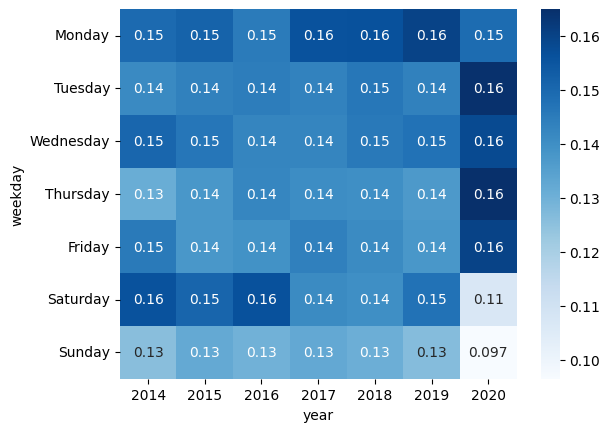

In [ ]:
sns.heatmap(
    yw_pivot/yw_pivot.sum(),
    cmap='Blues',
    annot=True,
);

* Ярко выраженных перекосов в течение недели нет, но можно заменить, что более загруженный день - Понедельник, а наименее загруженный день - Четверг, Пятница и Воскресенье.  
* Кажется, в 2020 году изменился график работы, потому что в будние дни количество регистраций животных увеличилось, а в выходные происходил сильный спад, более заментый, чем раньше.

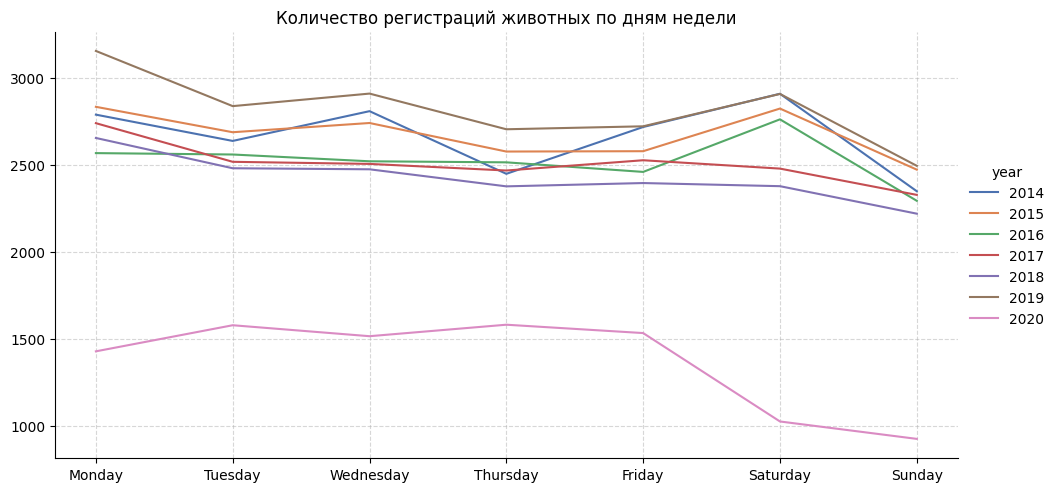

In [ ]:
sns.relplot(
    data=year_weekday,
    x='weekday',
    y='count',
    kind='line',
    aspect=2,
    hue='year',
    palette='deep'
)
plt.title('Количество регистраций животных по дням недели')
plt.grid(ls='--', alpha=0.5)
plt.xlabel('')
plt.ylabel('')
plt.show()

###Повторный прием животных

Количество животных, зарегистрированных с 2014 по 2020 год: 106300 шт.

In [ ]:
df['animal_id'].nunique()

106300

Добавил признак `visit_flag`: если животное было в приюте более одого раза, то он принимает значение *more than once*, в противном случае - *once*:

In [ ]:
visits = df['animal_id'].value_counts().rename('amount_visits').reset_index()
visits['visit_flag'] = visits['amount_visits'].map(lambda x: 'more than once' if x > 1 else 'once')

In [ ]:
visits

,animal_id,amount_visits,visit_flag
0,A721033,33,more than once
1,A718223,14,more than once
2,A718877,12,more than once
3,A706536,11,more than once
4,A716018,9,more than once
...,...,...,...
106295,A827432,1,once
106296,A782811,1,once
106297,A827431,1,once
106298,A786994,1,once


9630 животных из общего количества оказывались в приюте повторно.  
Это почти 10% от общего числа:

In [ ]:
visits['visit_flag'].value_counts()

,count
visit_flag,
once,96670
more than once,9630


Нашлось животное, которое было приюте 33 раза:

In [ ]:
visits['amount_visits'].unique()

array([33, 14, 12, 11,  9,  8,  7,  6,  5,  4,  3,  2,  1])

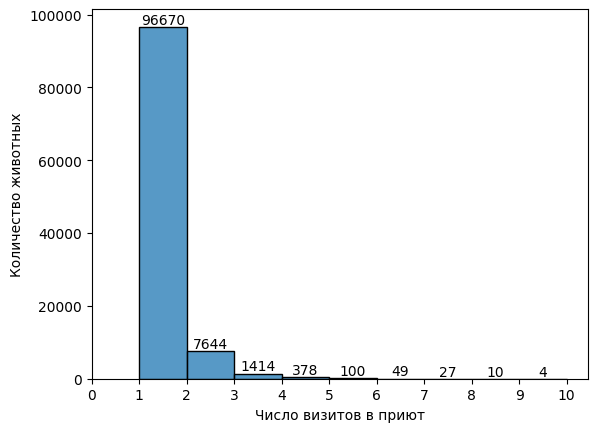

In [ ]:
sns.histplot(
    data=visits,
    x='amount_visits',
    binwidth=1,
    binrange=(1,10)
)

bars = plt.gca().patches
for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height

    plt.text(x, y, f'{height:.0f}', ha='center', va='bottom')

plt.xticks(np.arange(0, 11))
plt.xlabel('Число визитов в приют')
plt.ylabel('Количество животных')
plt.show()

Объединим таблицы, чтобы больше узнать о таких животных:

In [ ]:
full_table_visits = visits.merge(df, on='animal_id')
full_table_visits.head()

,animal_id,amount_visits,visit_flag,name,datetime,year,year_month,weekday,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A721033,33,more than once,Lil Bit,2019-02-24 21:53:00,2019,2019-02,Sunday,700 Allen St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle
1,A721033,33,more than once,Lil Bit,2018-03-07 08:27:00,2018,2018-03,Wednesday,4111 South 1St in Austin (TX),Public Assist,Normal,Dog,Neutered Male,2 years,Rat Terrier Mix,Tricolor/Brown Brindle
2,A721033,33,more than once,Lil Bit,2019-05-20 10:18:00,2019,2019-05,Monday,1819 South Pleasant Valley Road in Austin (TX),Public Assist,Normal,Dog,Neutered Male,4 years,Rat Terrier Mix,Tricolor/Brown Brindle
3,A721033,33,more than once,Lil Bit,2018-04-05 17:59:00,2018,2018-04,Thursday,9705 Manchaca Road in Austin (TX),Public Assist,Normal,Dog,Neutered Male,2 years,Rat Terrier Mix,Tricolor/Brown Brindle
4,A721033,33,more than once,Lil Bit,2018-09-24 19:44:00,2018,2018-09,Monday,Shady And Airport in Austin (TX),Public Assist,Normal,Dog,Neutered Male,3 years,Rat Terrier Mix,Tricolor/Brown Brindle


In [ ]:
unique_animals = full_table_visits[['animal_id', 'amount_visits', 'visit_flag', 'name', 'animal_type', 'breed']]\
                                    .drop_duplicates(subset='animal_id', ignore_index=True)
unique_animals

,animal_id,amount_visits,visit_flag,name,animal_type,breed
0,A721033,33,more than once,Lil Bit,Dog,Rat Terrier Mix
1,A718223,14,more than once,Bubba,Dog,St. Bernard Rough Coat/Boxer
2,A718877,12,more than once,Blacky,Dog,Labrador Retriever Mix
3,A706536,11,more than once,Butch,Dog,English Bulldog
4,A716018,9,more than once,Luke,Dog,Pit Bull Mix
...,...,...,...,...,...,...
106295,A827432,1,once,*Ed Sheeran,Dog,Golden Retriever/Labrador Retriever
106296,A782811,1,once,Blue,Dog,Siberian Husky
106297,A827431,1,once,*Jlo,Dog,Golden Retriever/Labrador Retriever
106298,A786994,1,once,Titan,Dog,Pit Bull


Топ-5 животных по количеству повторных регистраций в приюте - это собаки:

In [ ]:
unique_animals.head()

,animal_id,amount_visits,visit_flag,name,animal_type,breed
0,A721033,33,more than once,Lil Bit,Dog,Rat Terrier Mix
1,A718223,14,more than once,Bubba,Dog,St. Bernard Rough Coat/Boxer
2,A718877,12,more than once,Blacky,Dog,Labrador Retriever Mix
3,A706536,11,more than once,Butch,Dog,English Bulldog
4,A716018,9,more than once,Luke,Dog,Pit Bull Mix


Rat Terrier  
Порода собаки, которая оказывалась в приюте 33 раза:   

![Rat Terrier](https://upload.wikimedia.org/wikipedia/commons/4/4e/AmRatTerr2_wb.jpg)

При этом 80% животных, которые оказываются в приюте повторно, это собаки:

In [ ]:
(unique_animals.query('visit_flag == "more than once"')['animal_type'].value_counts(normalize=True) * 100).round(2)

,proportion
animal_type,
Dog,80.86
Cat,18.90
Other,0.24


Сравнение количества разного типа животных, которые были зарегистрированы в приюте несколько раз и один раз:

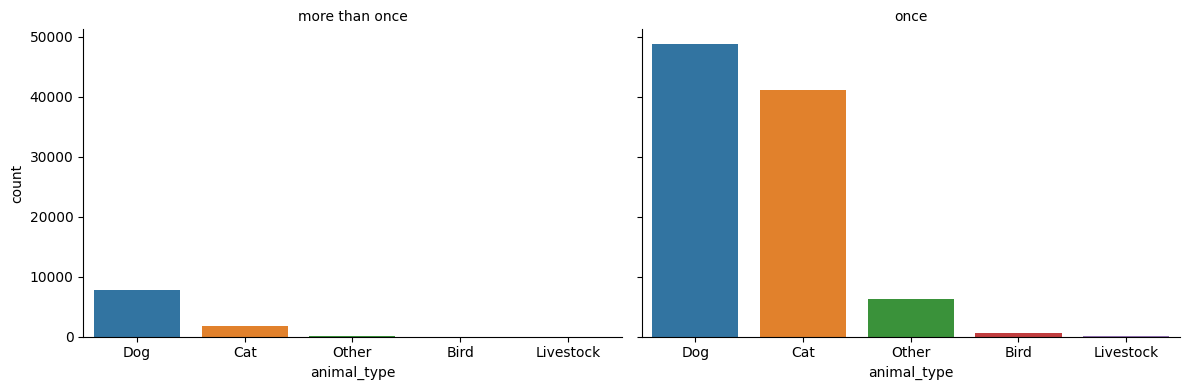

In [ ]:
g = sns.FacetGrid(
    unique_animals,
    col='visit_flag',
    hue='animal_type',
    aspect=1.5,
    height=4
    )

g.map_dataframe(sns.countplot, x='animal_type')
g.set_titles(col_template='{col_name}')
plt.show()

###Имена животных

In [ ]:
df.head()

,animal_id,name,datetime,year,year_month,weekday,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,2019-01-03 16:19:00,2019,2019-01,Thursday,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,2015,2015-07,Sunday,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2016,2016-04,Thursday,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A682524,Rio,2014-06-29 10:38:00,2014,2014-06,Sunday,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,2017-02-18 12:46:00,2017,2017-02,Saturday,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [ ]:
df['name_flag'] = df['name'].map(lambda x: 'no_name' if x == 'Unknown' else 'with_name')

Примерно 68.3% животных имеют имя при поступлении в приют:

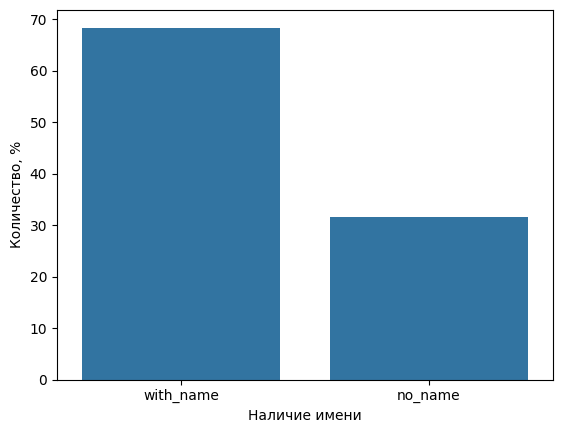

In [ ]:
sns.countplot(
    data=df,
    x='name_flag',
    stat='percent'
)
plt.xlabel('Наличие имени')
plt.ylabel('Количество, %')
plt.show()

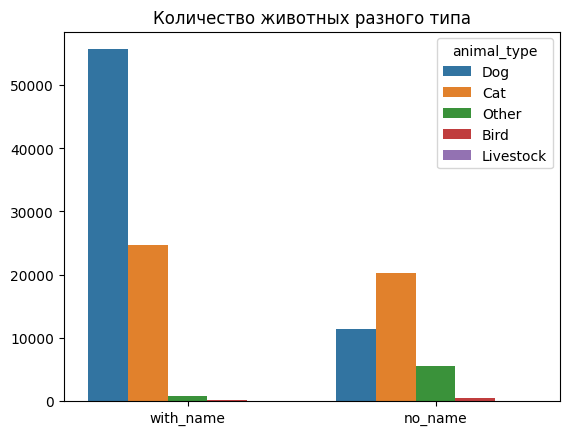

In [ ]:
sns.countplot(
    data=df,
    x='name_flag',
    hue='animal_type'
)

plt.title('Количество животных разного типа')
plt.xlabel('')
plt.ylabel('')
plt.show()

* Количество собак с именем значительно больше, чем остальных типов животных.
* Среди животных без имени преобладают кошки.  
* Животных из категории "Другие" больше среди безимянных - вероятно, это связано с тем, что в эту категорию попадают дикие звери.

####Топ-10 имен животных:

In [ ]:
df[df['name'] != 'Unknown']['name'].value_counts().head(10)

,count
name,
Max,539
Bella,492
Luna,478
Rocky,370
Daisy,354
Princess,317
Coco,313
Buddy,309
Charlie,308


####Топ-5 имен среди разных типов животных:

In [ ]:
name_type = df[df['name'] != 'Unknown'][['animal_type', 'name']].value_counts().reset_index()
name_type['rank'] = name_type.groupby('animal_type')['name'].cumcount() + 1
name_type = name_type[name_type['rank'] <= 5].reset_index(drop=True)
name_type

,animal_type,name,count,rank
0,Dog,Max,489,1
1,Dog,Bella,420,2
2,Dog,Luna,376,3
3,Dog,Rocky,346,4
4,Dog,Daisy,314,5
5,Cat,Luna,100,1
6,Cat,Bella,69,2
7,Cat,Kitty,65,3
8,Cat,Charlie,63,4
9,Cat,Shadow,62,5


* Самое популярное имя среди собак: Max, среди кошек: Luna, в категории другие: Oreo.  
* Bella и Luna входят в пятерку популярных имен среди и собак, и кошек.  
* Среди птиц и домашнего скота не так много животных, чтобы выделить популярное имя.

###Доля разных животных в приюте

Более 50% животных в приюте - это собаки:

In [ ]:
(df['animal_type'].value_counts(normalize=True)*100).round(2).rename('percentage')


,percentage
animal_type,
Dog,56.45
Cat,37.76
Other,5.29
Bird,0.48
Livestock,0.02


###Типы приема животных

Среди причин регистрации с большим отрывом преобладают бродячие животные (Stray), на втором месте - животные, сданные владельцами (Owner Surrender).

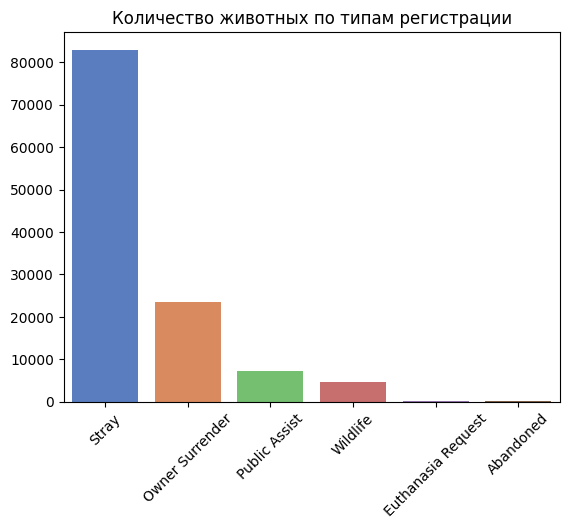

In [ ]:
sns.countplot(
    data=df,
    x='intake_type',
    palette='muted'
)
plt.xticks(rotation=45)
plt.title('Количество животных по типам регистрации')
plt.xlabel('')
plt.ylabel('')
plt.show()

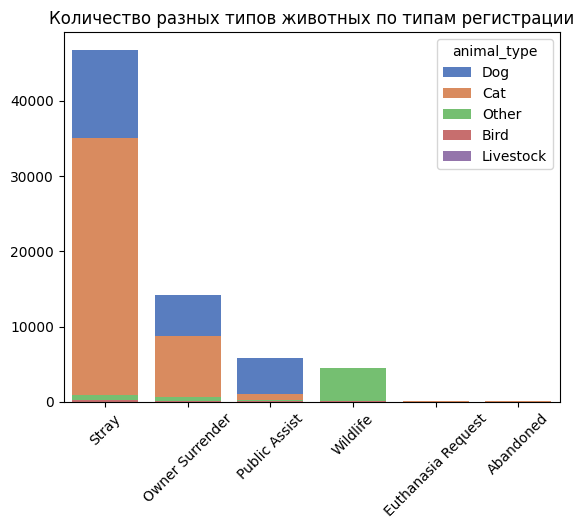

In [ ]:
sns.countplot(
    data=df,
    x='intake_type',
    hue='animal_type',
    palette='muted',
    dodge=False
)
plt.xticks(rotation=45)
plt.title('Количество разных типов животных по типам регистрации')
plt.xlabel('')
plt.ylabel('')
plt.show()

* Лидирующие категории по причинам приема: Stray, Owner Surrender, Public Assist. В каждой из них наибольшее количество собак, на втором месте - кошки.  
* Категорию Wildlife практически полностью занимает тип Other - такие животные, как еноты, барсуки, белки итд.

####Типы регистрации животных в разрезе их состояния

In [ ]:
intake_type_cond = pd.pivot_table(
    data=df,
    index='intake_type',
    columns='intake_condition',
    values='animal_id',
    aggfunc='count',
    fill_value=0
)
intake_type_cond

intake_condition,Aged,Behavior,Feral,Injured,Medical,Normal,Nursing,Other,Pregnant,Sick
intake_type,,,,,,,,,,
Abandoned,0,0,0,1,4,216,30,0,0,10
Euthanasia Request,34,0,0,18,0,82,0,1,0,91
Owner Surrender,90,8,9,424,15,21880,280,36,14,780
Public Assist,29,4,2,167,0,6767,119,44,6,152
Stray,246,6,88,4844,40,72046,2954,124,56,2521
Wildlife,0,0,1,825,0,2527,49,4,0,1237


Перейдем от абсолютных значений к долям:

In [ ]:
intake_type_cond['Total'] = intake_type_cond.sum(axis=1)
intake_type_cond_share = intake_type_cond.div(intake_type_cond['Total'], axis=0).round(2)
intake_type_cond_share

intake_condition,Aged,Behavior,Feral,Injured,Medical,Normal,Nursing,Other,Pregnant,Sick,Total
intake_type,,,,,,,,,,,
Abandoned,0.00,0.0,0.0,0.00,0.02,0.83,0.11,0.00,0.0,0.04,1.0
Euthanasia Request,0.15,0.0,0.0,0.08,0.00,0.36,0.00,0.00,0.0,0.40,1.0
Owner Surrender,0.00,0.0,0.0,0.02,0.00,0.93,0.01,0.00,0.0,0.03,1.0
Public Assist,0.00,0.0,0.0,0.02,0.00,0.93,0.02,0.01,0.0,0.02,1.0
Stray,0.00,0.0,0.0,0.06,0.00,0.87,0.04,0.00,0.0,0.03,1.0
Wildlife,0.00,0.0,0.0,0.18,0.00,0.54,0.01,0.00,0.0,0.27,1.0


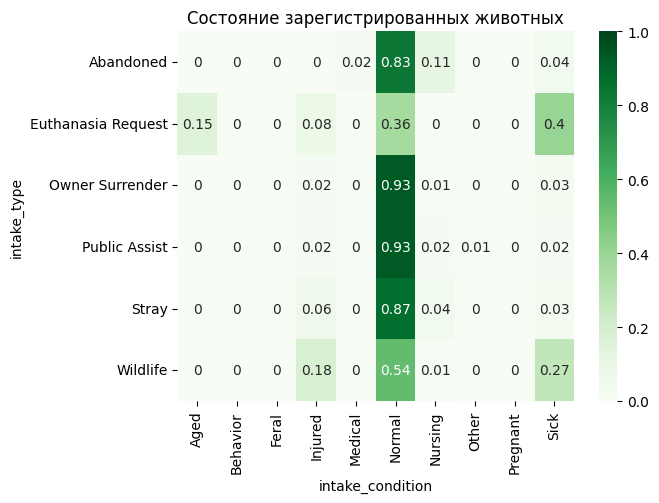

In [ ]:
sns.heatmap(
   intake_type_cond_share.loc[:,'Aged':'Sick'],
   annot=True,
   cmap='Greens',
   vmax=1,

)
plt.title('Состояние зарегистрированных животных')
plt.show()

* Вне зависимости от типа регистрации большинство животные оказывается в приюте в нормальном состоянии. Исключение - запрос на эвтаназию: среди них 40% животных больны, 36% в нормальном состоянии.

* Можно выделить тип диких животных (Wildlife): среди них 54% прибывают в нормальном состоянии, 27% больны и 18% ранены.

###Про эвтаназию

####По типам животных

Подробнее посмотрим на тип приема животных Запрос Эвтаназии (Euthanasia Request).  
Ранее выяснили, что запросов на эвтаназию в 2020 году не было, чтобы отобразить и эти данные, соберем новый датафрейм:

In [ ]:
indices = pd.MultiIndex.from_product([[2020], df['animal_type'].unique()], names=['year', 'animal_type'])
df2 = pd.DataFrame([0, 0, 0, 0, 0], index=indices, columns=['count']).reset_index()
df2

,year,animal_type,count
0,2020,Dog,0
1,2020,Cat,0
2,2020,Other,0
3,2020,Bird,0
4,2020,Livestock,0


In [ ]:
df1 = df.query('intake_type == "Euthanasia Request"')[['year', 'animal_type']].value_counts().reset_index()
df1.head()

,year,animal_type,count
0,2014,Dog,83
1,2015,Dog,60
2,2014,Cat,22
3,2016,Dog,15
4,2015,Cat,14


Количество эвтаназий в год для разных типов животных:

In [ ]:
euthanasia = pd.concat([df1, df2], ignore_index=True)
euthanasia

,year,animal_type,count
0,2014,Dog,83
1,2015,Dog,60
2,2014,Cat,22
3,2016,Dog,15
4,2015,Cat,14
5,2016,Cat,7
6,2017,Dog,5
7,2014,Other,4
8,2019,Other,4
9,2017,Cat,3


In [ ]:
pd.pivot_table(
  data=euthanasia,
  index='year',
  columns='animal_type',
  values='count',
  aggfunc='sum',
  fill_value=0,
  margins=True,
  margins_name='Total'
)



animal_type,Bird,Cat,Dog,Livestock,Other,Total
year,,,,,,
2014,1,22,83,0,4,110
2015,2,14,60,0,2,78
2016,0,7,15,0,2,24
2017,0,3,5,0,0,8
2018,0,0,0,0,2,2
2019,0,0,0,0,4,4
2020,0,0,0,0,0,0
Total,3,46,163,0,14,226


* Наибольшее число эвтаназий пришлось на собак и кошек (но их и больше в общем количестве зарегистрированных животных).  
* Также видно, что из года в год количество эвтаназий уменьшается (за исключением 2019 - произошел небольшой рост).
* Для птиц этой процедуры не было с 2016 года, для собак и кошек - с 2018 года.  
* За всё время процедура не понадобилась ни для одно животное из категории домашнего скота.

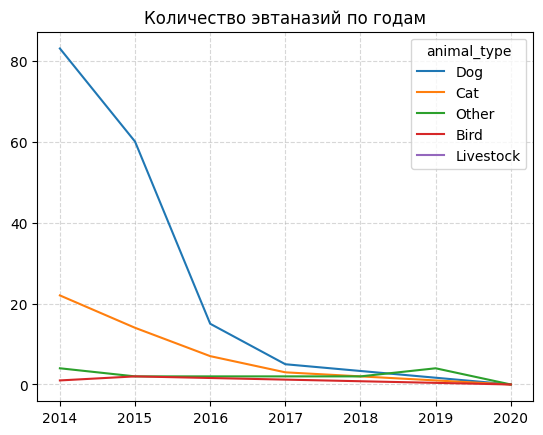

In [ ]:
sns.lineplot(
    data=euthanasia,
    x='year',
    y='count',
    hue='animal_type'
)
plt.title('Количество эвтаназий по годам')
plt.xlabel('')
plt.ylabel('')
plt.grid(ls='--', alpha=0.5)

####Типы животных и их состояние при запросе на эвтаназию

In [ ]:
cond_animal_type = pd.pivot_table(
    data=df.query('intake_type == "Euthanasia Request"'),
    index='animal_type',
    columns='intake_condition',
    values='animal_id',
    aggfunc='count',
    fill_value=0
)
cond_animal_type.div(cond_animal_type.sum(axis=1), axis=0).round(2)

intake_condition,Aged,Injured,Normal,Other,Sick
animal_type,,,,,
Bird,0.00,0.33,0.33,0.00,0.33
Cat,0.07,0.09,0.26,0.00,0.59
Dog,0.18,0.06,0.42,0.00,0.34
Other,0.14,0.29,0.00,0.07,0.50


* Наибольшая доля собак, которых усыпили, была в нормальном состоянии здоровья (42%), при этом наибольшее количество усыпленных кошек (59%) были больны.  
* 34% собак усыпили про причине болезни, 18% из-за возраста.
* 26% котов были отправлены на эвтаназию в нормальном состоянии здоровья.

